In [3]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

print("Libraries Imported")

Libraries Imported


In [4]:
# Creating global data frame of the skins within the case
# Data taken from data set made from snap shot of market
snake_bite_skins = pd.read_csv('Snake_Bite_Skins.csv')
snake_bite_skins.head()

,Skin Name,Skin Position,Rarity,StatTrak,Condition,Price
0,SG 553 | Heavy Metal,1,Blue,No,Battle-Scarred,0.17
1,SG 553 | Heavy Metal,1,Blue,No,Well-Worn,0.18
2,SG 553 | Heavy Metal,1,Blue,No,Field-Tested,0.19
3,SG 553 | Heavy Metal,1,Blue,No,Minimal Wear,0.31
4,SG 553 | Heavy Metal,1,Blue,No,Factory New,0.77


In [9]:
# Custom function to simulate opening cases, takes paramaters of how many cases openings and number of cases per opening
# The function will loop through through every case opening, and every case in that opening
# Varaibles initialized to hold skins opened, total price of skins when sold, total opening cost, and net balance
# Variables for every case are string for skin rarity, int for position, string for condition, name, and stratTrak value
# Randomly generate skin rarity, skin position based on rarity, conidtion, and whether its statTrak
# Add outcomes to the respect arrays for each opening then loop again
# Print graph of net balance of each opening
def open_cases(number_of_iterations, number_of_openings):
    iteration_arr = [0] * number_of_iterations
    for y in range(number_of_iterations):
        # Initialize array for skin rarities pulled during opening
        # [0] is blue, [1] is purple, [2] is pink, [3], is red, and [4] is red
        skin_rarity_arr = [0] * 5
        # Initialize variable to hold total skin value opened
        total_price_skins = 0
        # Initialize variable to hold price to open all cases, 0.5 is case price and 3.39 is key price
        total_case_cost = (number_of_openings*(0.5+3.39))
        # Initialize variable to hold net balance after openings
        overall_balance = 0

        for x in range(number_of_openings):
            # Initialize variable to hold skin rarity: blue, purple, pink, red, or gold
            skin_rarity = ""
            # Initialize variable to hold skin position in dataset dependent on number of skins per rarity
            skin_position = 0
            # Initialize variable to hold skin conidtions: battle-scarred, well-worn, field-tested, minimal wear, factory new
            skin_conidition = ""
            # Initialie variable to hold skin price
            skin_price = 0
            # Initialize variable to hold skin name
            skin_name = ""
            # Initialize varibale to hold whether the skin is statTrack or not
            skin_stattrak = ""

            rng = round(rnd.uniform(0, 100), 2)

            # 0.26% to get gold
            if rng > 0 and rng <= 0.26:
                skin_rarity = "Gold"
                skin_rarity_arr[4] += 1
            # 0.64% to get red
            elif rng > 0.26 and rng <= 0.9:
                skin_rarity = "Red"
                skin_rarity_arr[3] += 1
            # 3.2% to get pink
            elif rng > 0.9 and rng <= 4.1:
                skin_rarity = "Pink"
                skin_rarity_arr[2] += 1
            # 15.98% to get purple
            elif rng > 4.1 and rng <= 20.08:
                skin_rarity = "Purple"
                skin_rarity_arr[1] += 1
            # 79.92% to get blue
            else:
                skin_rarity = "Blue"
                skin_rarity_arr[0] += 1

            if skin_rarity == "Gold":
                skin_position = rnd.randint(1, 24)
            elif skin_rarity == "Red":
                skin_position = rnd.randint(1, 2)
            elif skin_rarity == "Pink":
                skin_position = rnd.randint(1, 3)
            elif skin_rarity == "Purple":
                skin_position = rnd.randint(1, 5)
            else:
                skin_position = rnd.randint(1, 7)

            rng = round(rnd.uniform(0, 100), 2)

            # 9.93% to get battle-scarred
            if rng > 0 and rng <= 9.93:
                skin_condition = "Battle-Scarred"
            # 7.92% to get well-worn
            elif rng > 9.93 and rng <= 17.85:
                skin_condition = "Well-Worn"
            # 43.18% to get field-tested
            elif rng > 17.85 and rng <= 61.03:
                skin_condition = "Field-Tested"
            # 24.68% to get miminal wear
            elif rng > 61.03 and rng <= 85.71:
                skin_condition = "Minimal Wear"
            # 14.71% to get factory new
            else:
                skin_condition = "Factory New"

            rng = round(rnd.uniform(0, 100), 2)

            if rng > 0 and rng <= 10.09 and skin_rarity != "Gold":
                skin_stattrak = "Yes"
            else:
                skin_stattrak = "No"

            skin_price = snake_bite_skins.loc[(snake_bite_skins['Skin Position'] == skin_position) & (snake_bite_skins['Rarity'] == skin_rarity) & (snake_bite_skins['StatTrak'] == skin_stattrak) & (snake_bite_skins['Condition'] == skin_condition), 'Price'].values[0]

            total_price_skins += skin_price

            skin_name = snake_bite_skins.loc[(snake_bite_skins['Skin Position'] == skin_position) & (snake_bite_skins['Rarity'] == skin_rarity) & (snake_bite_skins['StatTrak'] == skin_stattrak) & (snake_bite_skins['Condition'] == skin_condition), 'Skin Name '].values[0]

            if skin_stattrak == 'Yes':
                print("Opened: " + skin_rarity + " StatTrak " + skin_name + " in condition: " + skin_condition + ", price is: " + str(skin_price))
            else:
                print("Opened: " + skin_rarity + " " + skin_name + " in condition: " + skin_condition + ", price is: $" + str(skin_price))

            print("")

        overall_balance = total_price_skins - total_case_cost

        print("Number of blues opened: " + str(skin_rarity_arr[0]))
        print("Number of purples opened: " + str(skin_rarity_arr[1]))
        print("Number of pinks opened: " + str(skin_rarity_arr[2]))
        print("Number of reds opened: " + str(skin_rarity_arr[3]))
        print("Number of golds opened: " + str(skin_rarity_arr[4]))
        print("Price to open cases: $" + str(format(total_case_cost, ".2f")))
        print("Money made opening cases: $" + str(format(total_price_skins, ".2f")))
        print("Net Balance: $" + str(format(overall_balance, ".2f")))
        
        iteration_arr[y] = format(overall_balance, ".2f")
        
        if overall_balance < 0:
            plt.bar((y+1), overall_balance, color="red")
        else:
            plt.bar((y+1), overall_balance, color="green")
        
    print(iteration_arr)
    plt.title("Net balances after openings")
    plt.xlabel("Opening number")
    plt.ylabel("Value gained/lost")
    plt.show()
    
print("Custom Functions Created")

Custom Functions Created


Opened: Blue Glock-18 | Clear Polymer in condition: Field-Tested, price is: $0.18

Opened: Blue Glock-18 | Clear Polymer in condition: Field-Tested, price is: $0.18

Opened: Blue StatTrak M249 | O.S.I.P.R. in condition: Field-Tested, price is: 0.53

Opened: Blue Glock-18 | Clear Polymer in condition: Minimal Wear, price is: $0.31

Opened: Blue Glock-18 | Clear Polymer in condition: Field-Tested, price is: $0.18

Opened: Blue SG 553 | Heavy Metal in condition: Minimal Wear, price is: $0.31

Opened: Blue UMP-45 | Oscillator in condition: Field-Tested, price is: $0.19

Opened: Purple MAC-10 | Button Masher in condition: Minimal Wear, price is: $0.95

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue Glock-18 | Clear Polymer in condition: Battle-Scarred, price is: $0.19

Opened: Blue R8 Revolver | Junk Yard in condition: Battle-Scarred, price is: $0.19

Opened: Blue UMP-45 | Oscillator in condition: Factory New, price is: $0.6

Opened: Blue Glock-18 | 

Opened: Purple AK-47 | Slate in condition: Field-Tested, price is: $5.15

Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Blue Nova | Windblown in condition: Well-Worn, price is: $0.29

Opened: Purple AK-47 | Slate in condition: Well-Worn, price is: $4.63

Opened: Blue StatTrak SG 553 | Heavy Metal in condition: Well-Worn, price is: 0.73

Opened: Purple Negev | dev_texture in condition: Minimal Wear, price is: $0.96

Opened: Blue StatTrak UMP-45 | Oscillator in condition: Field-Tested, price is: 0.51

Opened: Blue StatTrak R8 Revolver | Junk Yard in condition: Factory New, price is: 2.94

Opened: Blue UMP-45 | Oscillator in condition: Field-Tested, price is: $0.19

Opened: Blue R8 Revolver | Junk Yard in condition: Minimal Wear, price is: $0.3

Opened: Blue SG 553 | Heavy Metal in condition: Field-Tested, price is: $0.19

Opened: Blue Nova | Windblown in condition: Well-Worn, price is: $0.29

Opened: Blue CZ75-Auto | Circaetus in condition: Battl


Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Red M4A4 | In Living Color in condition: Minimal Wear, price is: $26.68

Opened: Purple AK-47 | Slate in condition: Field-Tested, price is: $5.15

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue Glock-18 | Clear Polymer in condition: Minimal Wear, price is: $0.31

Opened: Blue R8 Revolver | Junk Yard in condition: Minimal Wear, price is: $0.3

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue StatTrak Nova | Windblown in condition: Field-Tested, price is: 0.52

Opened: Blue R8 Revolver | Junk Yard in condition: Well-Worn, price is: $0.18

Opened: Blue UMP-45 | Oscillator in condition: Field-Tested, price is: $0.19

Opened: Blue R8 Revolver | Junk Yard in condition: Minimal Wear, price is: $0.3

Opened: Purple AK-47 | Slate in condition: Field-Tested, price is: $5.15

Opened: Blue R8 Revolver | Junk Yard in con

Opened: Blue SG 553 | Heavy Metal in condition: Field-Tested, price is: $0.19

Opened: Purple StatTrak P250 | Cyber Shell in condition: Field-Tested, price is: 0.83

Opened: Purple Desert Eagle | Trigger Discipline in condition: Factory New, price is: $4.41

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Purple AK-47 | Slate in condition: Field-Tested, price is: $5.15

Opened: Blue UMP-45 | Oscillator in condition: Battle-Scarred, price is: $0.19

Opened: Blue UMP-45 | Oscillator in condition: Minimal Wear, price is: $0.3

Opened: Blue Glock-18 | Clear Polymer in condition: Minimal Wear, price is: $0.31

Opened: Blue SG 553 | Heavy Metal in condition: Field-Tested, price is: $0.19

Opened: Blue StatTrak Glock-18 | Clear Polymer in condition: Field-Tested, price is: 0.49

Opened: Blue SG 553 | Heavy Metal in condition: Minimal Wear, price is: $0.31

Opened: Red M4A4 | In Living Color in condition: Minimal Wear, price is: $26.68

Opened: Blue UMP

Opened: Blue UMP-45 | Oscillator in condition: Minimal Wear, price is: $0.3

Opened: Blue R8 Revolver | Junk Yard in condition: Factory New, price is: $0.74

Opened: Pink Galil AR | Chromatic Aberration in condition: Field-Tested, price is: $2.93

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue Glock-18 | Clear Polymer in condition: Battle-Scarred, price is: $0.19

Opened: Blue UMP-45 | Oscillator in condition: Field-Tested, price is: $0.19

Opened: Purple P250 | Cyber Shell in condition: Field-Tested, price is: $0.52

Opened: Blue SG 553 | Heavy Metal in condition: Battle-Scarred, price is: $0.17

Opened: Blue CZ75-Auto | Circaetus in condition: Field-Tested, price is: $0.18

Opened: Purple Negev | dev_texture in condition: Factory New, price is: $1.76

Opened: Purple MAC-10 | Button Masher in condition: Battle-Scarred, price is: $0.49

Opened: Blue StatTrak Nova | Windblown in condition: Well-Worn, price is: 0.52

Opened: Blue UMP-45 | Oscillat

Opened: Blue M249 | O.S.I.P.R. in condition: Field-Tested, price is: $0.19

Opened: Blue R8 Revolver | Junk Yard in condition: Minimal Wear, price is: $0.3

Opened: Blue M249 | O.S.I.P.R. in condition: Minimal Wear, price is: $0.31

Opened: Blue UMP-45 | Oscillator in condition: Factory New, price is: $0.6

Opened: Blue Nova | Windblown in condition: Minimal Wear, price is: $0.31

Opened: Blue CZ75-Auto | Circaetus in condition: Field-Tested, price is: $0.18

Opened: Purple P250 | Cyber Shell in condition: Field-Tested, price is: $0.52

Opened: Purple Negev | dev_texture in condition: Battle-Scarred, price is: $0.47

Opened: Blue CZ75-Auto | Circaetus in condition: Field-Tested, price is: $0.18

Opened: Pink MP9 | Food Chain in condition: Minimal Wear, price is: $5.48

Opened: Blue Glock-18 | Clear Polymer in condition: Field-Tested, price is: $0.18

Opened: Blue M249 | O.S.I.P.R. in condition: Well-Worn, price is: $0.19

Opened: Purple MAC-10 | Button Masher in condition: Field-Tested

Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Blue UMP-45 | Oscillator in condition: Field-Tested, price is: $0.19

Opened: Blue UMP-45 | Oscillator in condition: Field-Tested, price is: $0.19

Opened: Blue CZ75-Auto | Circaetus in condition: Battle-Scarred, price is: $0.18

Opened: Purple Negev | dev_texture in condition: Well-Worn, price is: $0.49

Opened: Blue Nova | Windblown in condition: Well-Worn, price is: $0.29

Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue Nova | Windblown in condition: Minimal Wear, price is: $0.31

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue UMP-45 | Oscillator in condition: Field-Tested, price is: $0.19

Opened: Blue Glock-18 | Clear Polymer in condition: Field-

Opened: Purple Negev | dev_texture in condition: Field-Tested, price is: $0.54

Opened: Purple P250 | Cyber Shell in condition: Field-Tested, price is: $0.52

Opened: Pink MP9 | Food Chain in condition: Field-Tested, price is: $3.18

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue SG 553 | Heavy Metal in condition: Field-Tested, price is: $0.19

Opened: Blue M249 | O.S.I.P.R. in condition: Factory New, price is: $0.6

Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Blue M249 | O.S.I.P.R. in condition: Minimal Wear, price is: $0.31

Opened: Purple P250 | Cyber Shell in condition: Field-Tested, price is: $0.52

Opened: Blue M249 | O.S.I.P.R. in condition: Field-Tested, price is: $0.19

Opened: Blue Nova | Windblown in condition: Battle-Scarred, price is: $0.28

Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Blue UMP-45 | Oscillator in condition: Factory New, price is: 

Opened: Blue UMP-45 | Oscillator in condition: Field-Tested, price is: $0.19

Opened: Blue StatTrak UMP-45 | Oscillator in condition: Field-Tested, price is: 0.51

Opened: Blue StatTrak Glock-18 | Clear Polymer in condition: Field-Tested, price is: 0.49

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue Glock-18 | Clear Polymer in condition: Minimal Wear, price is: $0.31

Opened: Blue Nova | Windblown in condition: Minimal Wear, price is: $0.31

Opened: Blue CZ75-Auto | Circaetus in condition: Field-Tested, price is: $0.18

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Blue SG 553 | Heavy Metal in condition: Factory New, price is: $0.77

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue Nova | Windblown in

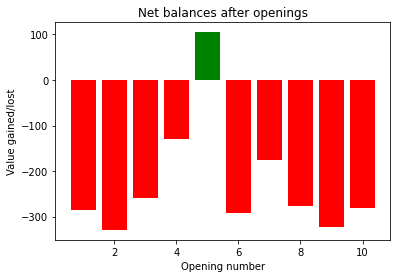

In [10]:
data_points = open_cases(10, 100)